# W09 Data Mining
### **Jessica Laurentia Tedja - 0706022310008**

#### **Part A – Data Preprocessing**

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [164]:
# load dataset and show the first five sample & rename columns
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.rename(columns={'Tingkat/Lantai ': 'Tingkat/Lantai'}, inplace=True)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [165]:
# shape data
df.shape

(308, 12)

In [166]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [167]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [168]:
#Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64


In [169]:
#Check for duplicate values
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
3


In [170]:
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
13,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil


In [171]:
#drop duplicate but keep first
df = df.drop_duplicates(keep='first')

In [172]:
# shape data after remove duplicate
df.shape

(305, 12)

In [173]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [174]:
df = df.drop(columns=['Terjual/Belum'])
# The column “Terjual/Belum” was dropped because it contains only one unique value (“Belum”),
# meaning there is no variation or useful information for analysis.

### **Part B – Exploratory Data Analysis**

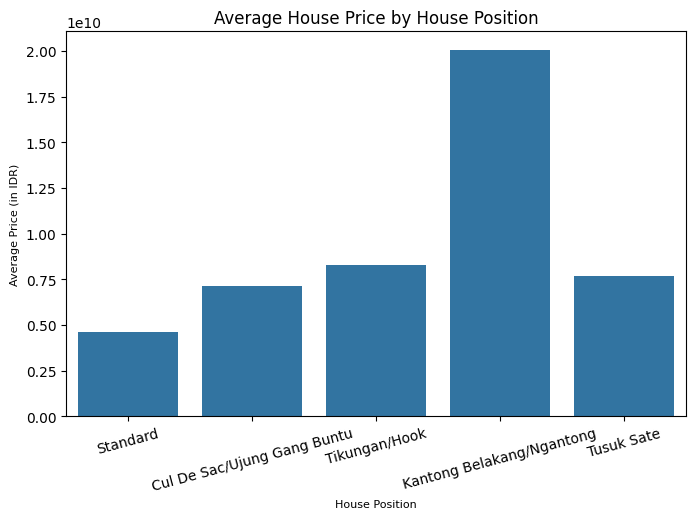

In [175]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Posisi Rumah',
    y='Harga Penawaran (dari Owner)',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.title('Average House Price by House Position')
plt.xlabel('House Position',fontsize=8)
plt.ylabel('Average Price (in IDR)',fontsize=8)
plt.xticks(rotation=15)
plt.show()

The bar chart shows that houses located at **Kantong Belakang/Ngantong** and **Tikungan/Hook** positions tend to have the **highest average prices** compared to other positions such as **Standard or Cul De Sac/Ujung Gang Buntu**.

This indicates that house position significantly affects property value houses in corner or inner-lot positions may offer larger land areas, better airflow, or more strategic access, making them more desirable and expensive in the housing market.

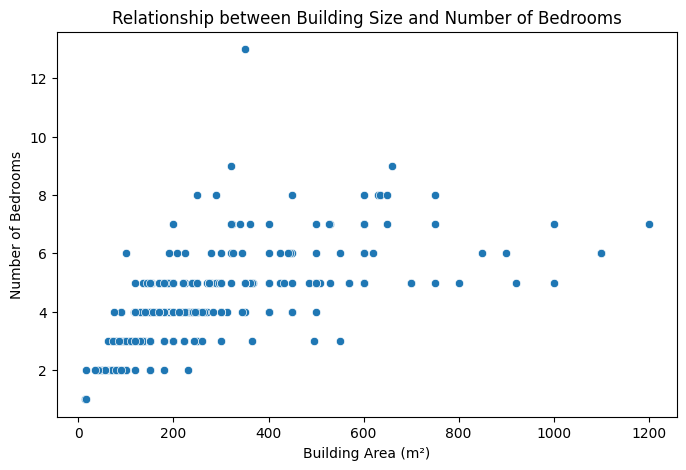

In [176]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Luas Bangunan (m2)', y='Jumlah Kamar', data=df)
plt.title('Relationship between Building Size and Number of Bedrooms')
plt.xlabel('Building Area (m²)')
plt.ylabel('Number of Bedrooms')
plt.show()

The scatter plot indicates a **positive** relationship between **building area** and the number of bedrooms. As the building size increases, the number of bedrooms generally tends to rise, suggesting that larger houses are designed to accommodate more rooms.

However, there is a noticeable variation: some medium-sized houses already have many bedrooms, while a few large houses have fewer. This implies that house layout and architectural design choices also influence the number of bedrooms, not just total building size.

### **Part C – Data Preparation for Clustering**

## Data Transformation

In [177]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding
area_category_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df['Area Category'] = df['Area Category'].map(area_category_mapping)

lebar_jalan_depan_rumah_mapping = {'<1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_depan_rumah_mapping)

# 2. Nominal Encoding
nominal_cols = ['Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
256,2,11.0,105,89,3,2,2,1860000000,3.0,2.0,2.0
190,2,123.0,754,530,7,5,2,14000000000,1.0,2.0,1.0
23,2,73.0,144,180,5,4,2,2900000000,1.0,2.0,1.0
169,1,61.0,67,68,2,2,2,849000000,3.0,2.0,1.0
82,1,118.0,120,130,3,2,2,1350000000,3.0,2.0,1.0


In [178]:
#Apply data transformation, create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy()

# Fit and transform the selected numerical columns
df_scaled = sc.fit_transform(df[[
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai',
    'Harga Penawaran (dari Owner)'
]])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=[
    'Luas Tanah (m2)',
    'Luas Bangunan (m2)',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai',
    'Harga Penawaran (dari Owner)'
])

# Show first few rows
df_scaled.head()


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.060732,0.154902,-0.160064,-0.205482,0.315414,-0.184628
1,-0.977403,-0.967754,-1.380552,-1.434347,0.315414,-0.570059
2,-0.285313,-0.453203,0.450180,0.408950,0.315414,-0.280620
3,-0.201273,-0.078985,0.450180,1.023383,0.315414,-0.232624
4,0.604517,1.558222,0.450180,1.023383,0.315414,-0.004644


In [179]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,-1.747236e-16,8.736181e-17,1.164824e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-1.990796e+00,-1.434347e+00,-1.647879e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-7.703082e-01,-8.199149e-01,3.154143e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-1.600640e-01,-2.054824e-01,3.154143e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,4.501801e-01,4.089502e-01,3.154143e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,5.332133e+00,5.938843e+00,4.242001e+00,1.127437e+01


#### Experiment with different clustering parameters

Skipping Ward linkage with Manhattan metric (not supported).


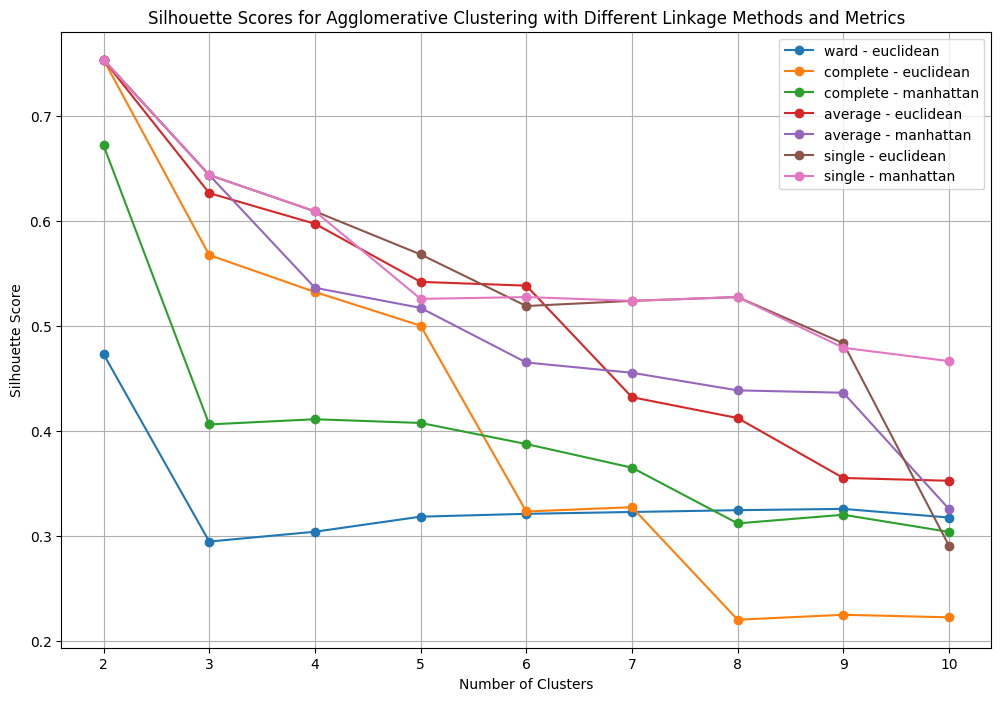

Best Silhouette Score: 0.7533138555676027
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [180]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

#### **Part D – Hierarchical Clustering Modeling**

**Model 1**: Using the best combination of parameters from Part C

In [181]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [182]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7533138555676027


**Model 2:** Using Ward linkage with the same number of clusters (n_clusters)

In [183]:
# Hierarchical Clustering
aggloWard = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_W = aggloWard.fit_predict(df_scaled)

In [184]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc_W)
print(ss)

0.47292973260268667


**Visualize Dendrograms Model 1**

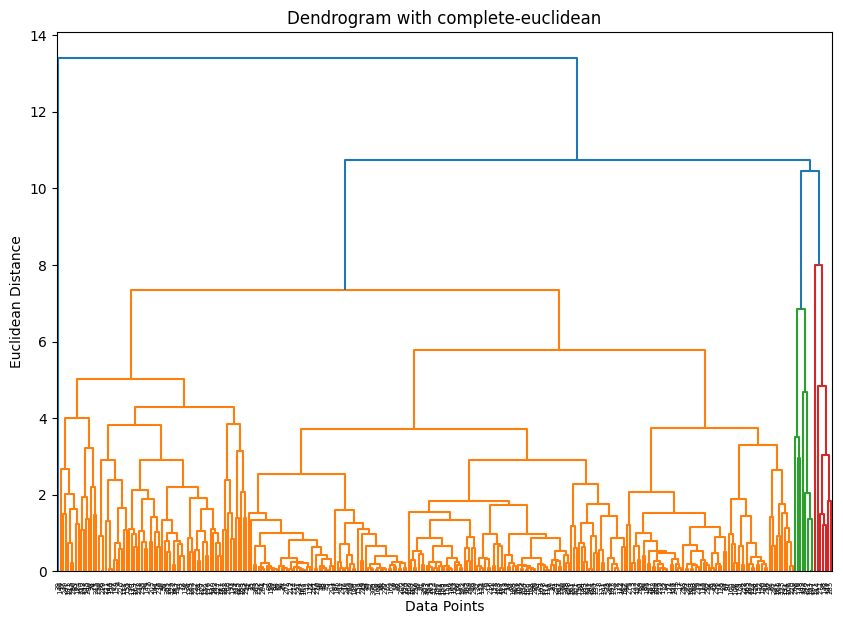

In [185]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Visualize Dendrograms Model 2**

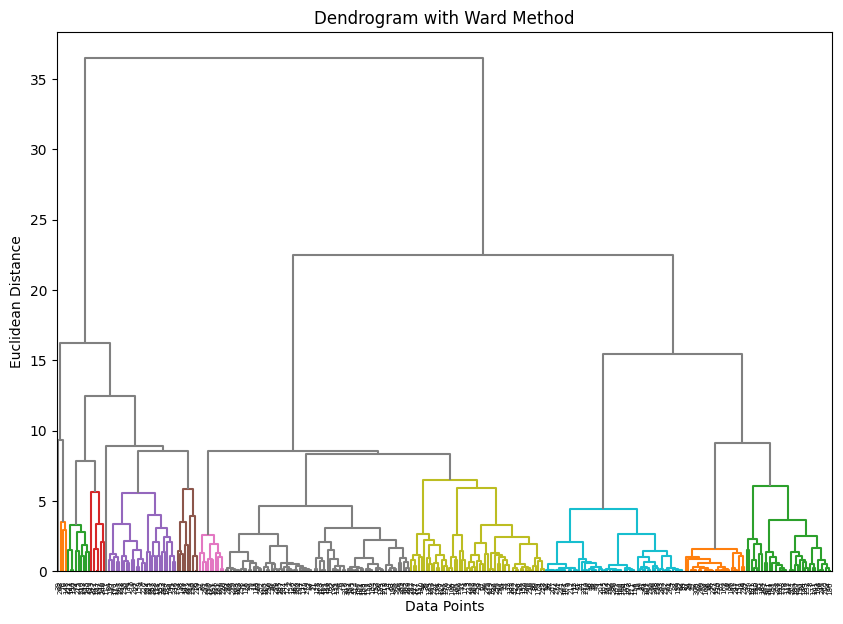

In [186]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Merge cluster labels with the original dataset

In [187]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1.0,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,NaN,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1.0,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1.0,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1.0,0


In [188]:
df['AggloWard'] = y_hc_W
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo,AggloWard
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1.0,0,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,NaN,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1.0,0,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1.0,0,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1.0,0,1


#### **Part E – Comparison & Interpretation**

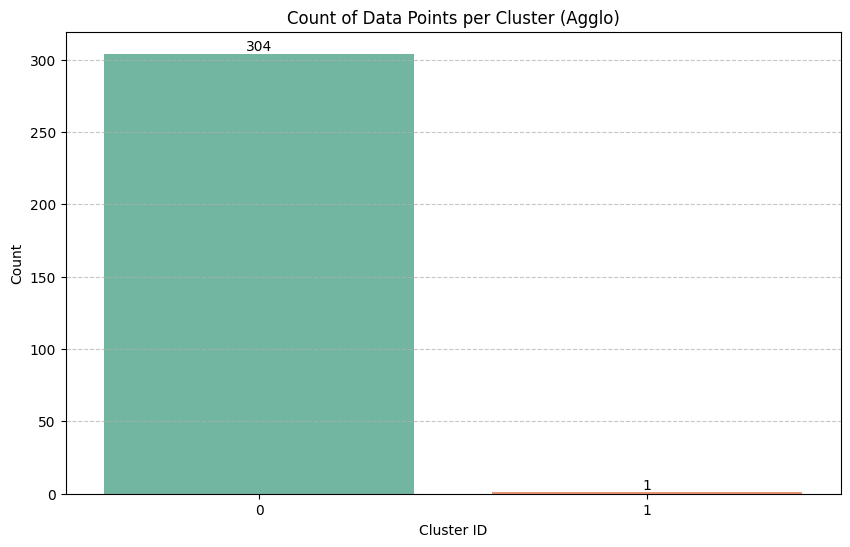

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

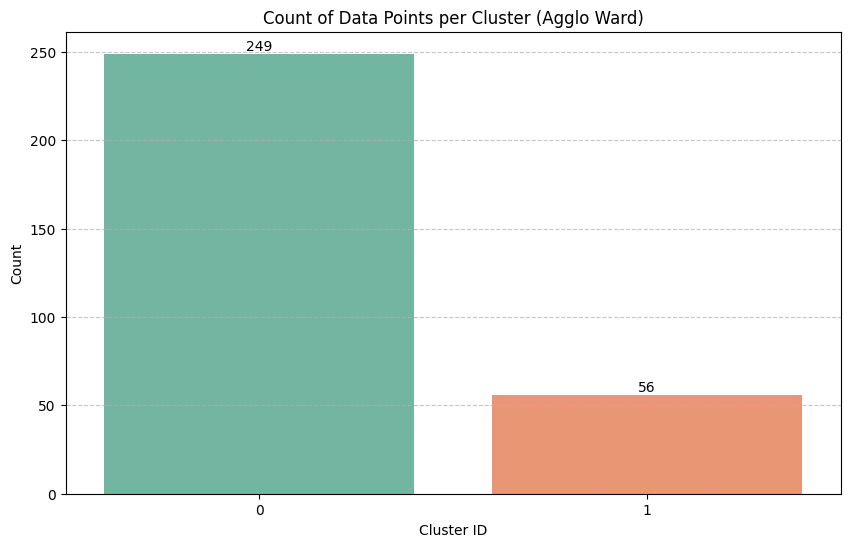

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo Ward' column of df
cluster_counts = df['AggloWard'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Ward)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Statistical Summary for each cluster

In [195]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
cluster                                                                      
0              11.0   304      226.490132  162.5         265.789474  200.0   
1              30.0     1      600.000000  600.0         600.000000  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           4.253289    4.0           3.328947    3.0       1.842105    2.0   
1           7.000000    7.0           5.000000    5.0       1.000000    1.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
cluster                                                                        
0                   1   304                           1.0   291          2.0   
1                   1     1                           1.0     1          2.0   

              Arah Hadap Rumah        
        count             mode count  
cluster                               
0         304              3.0   304  
1           1              0.0     1

In [196]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_W).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
cluster                                                                      
0              11.0   249      155.935743  136.0         187.196787  170.0   
1              48.0    56      546.875000  464.5         621.214286  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           3.831325    4.0           2.903614    3.0       1.807229    2.0   
1           6.178571    6.0           5.250000    5.0       1.982143    2.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
cluster                                                                        
0                   1   249                           1.0   236          2.0   
1                   2    56                           1.0    56          2.0   

              Arah Hadap Rumah        
        count             mode count  
cluster                               
0         249              3.0   249  
1          56              0.0    56

Based on the comparison between the two hierarchical clustering methods, the **Ward linkage method produces a more meaningful** segmentation of the property dataset. Ward’s method minimizes the variance within clusters, resulting in compact and well-separated groups that reflect clear differences in property characteristics. The clusters formed under this method show distinct variations in land area, building size, number of rooms, and area category, indicating separate housing market segments such as standard and premium residential areas.

#### **Provide a managerial interpretation and potential business implications**

**Cluster 0 — Compact Residential Segment (n=249)**

**Profile:**

Properties in this segment have smaller land and building areas (≈226 m² and 265 m² on average), 3–4 bedrooms, and 3 bathrooms. Most are in standard residential zones with moderate road access (ROW 1–2 Mobil).

**Meaning:**

This represents affordable housing or middle-class residential areas targeted at families seeking functionality and accessibility at a reasonable price.

**Business Implications & Strategies:**

* Pricing Strategy: Maintain competitive pricing with installment options or joint-financing programs.
* Development Focus: Prioritize compact housing projects near public facilities (schools, markets, transit).
Marketing Strategy: Emphasize practicality, family convenience, and community-based living.
* Target Audience: First-time homeowners or middle-income families.

**Key KPIs:** Occupancy rate, unit turnover time, and buyer conversion ratio.

**Cluster 1 — Premium Housing Segment (n=56)**

**Profile:**

Properties with significantly larger land and building sizes (≈600 m² each), 6–7 bedrooms, and 5 bathrooms. These are located in premium areas with wider main roads (>2 Mobil), often representing luxury neighborhoods.

**Meaning:**

This segment captures high-end and exclusive housing markets with strong purchasing power, focusing on comfort, status, and investment value.

**Business Implications & Strategies:**

* Pricing Strategy: Apply premium pricing with added value through smart-home features or modern architecture.
* Development Focus: Design gated communities with green spaces, private facilities, and 24-hour security.
Marketing Strategy: Focus on exclusivity, use digital marketing, private viewings, and partnerships with real estate agents.
* Target Audience: Upper-class families, executives, and property investors.
Key KPIs: Average selling price per m², profit margin, and brand reputation in luxury real estate.

### **General Recommendations**

Segmentation Focus:
* Cluster 0 → “Essential Housing” – prioritize affordable family homes with moderate facilities.
* Cluster 1 → “Luxury Estates” – emphasize premium designs and exclusive locations.

Pricing & Development Strategy:
* Offer flexible financing and affordable cluster projects for Cluster 0 buyers.
* Introduce high-margin, low-volume premium projects for Cluster 1.

Marketing Communication:
* Cluster 0: Promote through social media, property expos, and family-oriented campaigns.
* Cluster 1: Use private networking events, real estate agents, and personalized digital marketing.

Monitoring & Evaluation:
* Review segmentation every 6–12 months to track shifting property demand.
* Monitor price elasticity and buyer conversion trends within each cluster to adjust marketing and development strategies accordingly.